In [2]:
import matplotlib.pyplot as plt
import numpy
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [3]:
# hyperparams
in_chan = 28 * 28
hidden_ch = 400
out_ch = 80
device_id = 0
# device = 'cpu' if device_id == -1 else f'cuda:{device_id}'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
n_epochs = 6
batch_size = 128

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5)),
     ])


dataset_train = datasets.MNIST('.', 
                               train=True,            
                               download=True, 
                               transform=transform)
trainloader = torch.utils.data.DataLoader(dataset_train, 
                                          batch_size=batch_size,
                                          shuffle=True, 
                                          num_workers=2, 
                                          drop_last = True,)

dataset_test = datasets.MNIST('.', 
                              train=False,
                              download=True, 
                              transform=transform)
testloader = torch.utils.data.DataLoader(dataset_train, 
                                          batch_size=batch_size,
                                          shuffle=True, 
                                          num_workers=2, 
                                          drop_last = True,)

100%|██████████| 9912422/9912422 [00:00<00:00, 229323768.43it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 25806496.34it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 68993329.97it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 23548243.22it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [5]:
dataset_test[555]

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [6]:
class Encoder(nn.Module):
  #28*28 -> hidden -> hidden_out
  def __init__(self, input_dim, hidden_dim, out_dim):
    super().__init__()
    #TODO try to use other layers
    self.linear1 = nn.Linear(input_dim, hidden_dim)
    self.do = nn.Dropout(0.1)
    self.activ = nn.ReLU()
    self.linear2 = nn.Linear(hidden_dim, out_dim)

  def forward(self, x):
    x = self.activ(self.do(self.linear1(x)))

    return self.linear2(x)

class Decoder(nn.Module):
  #hidden_out-> hidden -> 28*28 
  def __init__(self, input_dim, hidden_dim, out_dim):
    super().__init__()
    #TODO try to use other layers
    self.linear1 = nn.Linear(input_dim, hidden_dim)
    self.do = nn.Dropout(0.1)
    self.activ = nn.ReLU()
    self.linear2 = nn.Linear(hidden_dim, out_dim)

  def forward(self, x):
    x = self.activ(self.do(self.linear1(x)))

    return self.linear2(x)

class LinearAutoEncoder(nn.Module):
  def __init__(self, input_dim, hidden_dim, out_dim):
    super().__init__()
    self.encoder = Encoder(input_dim, hidden_dim, out_dim)
    self.decoder = Decoder(out_dim, hidden_dim, input_dim)

  def forward(self, x):
    hidden = self.encoder(x)
    x_ = self.decoder(hidden)

    return x_


In [10]:
model = LinearAutoEncoder(in_chan, hidden_ch, out_ch).to(device)
optim = torch.optim.Adam(model.parameters())
loss_func1 = nn.MSELoss() #TODO try to use MAE
loss_func2 = nn.L1Loss()

epoch: 0, step: 0, loss: 0.934643030166626
epoch: 0, step: 200, loss: 0.10238780826330185
epoch: 0, step: 400, loss: 0.08753205835819244


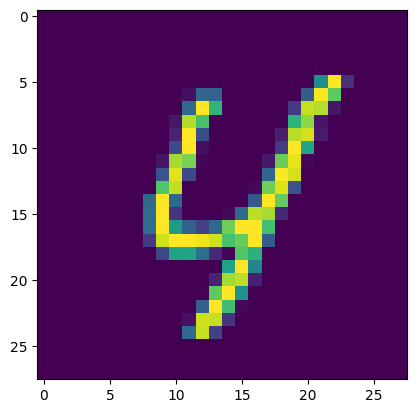

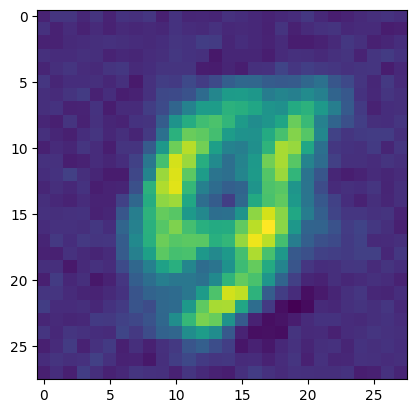

epoch: 1, step: 0, loss: 0.07951421290636063
epoch: 1, step: 200, loss: 0.06670821458101273
epoch: 1, step: 400, loss: 0.06621693819761276


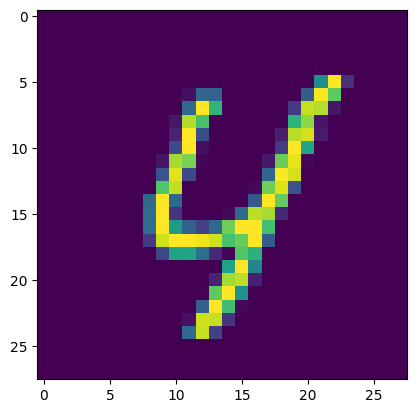

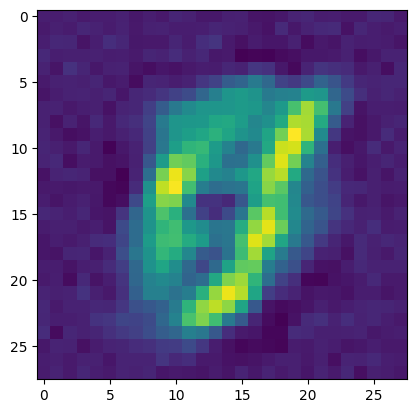

epoch: 2, step: 0, loss: 0.0653584748506546
epoch: 2, step: 200, loss: 0.06465502828359604
epoch: 2, step: 400, loss: 0.0621984526515007


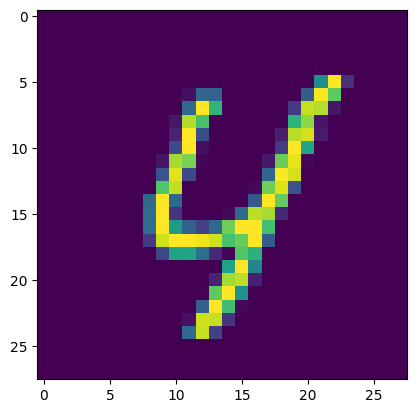

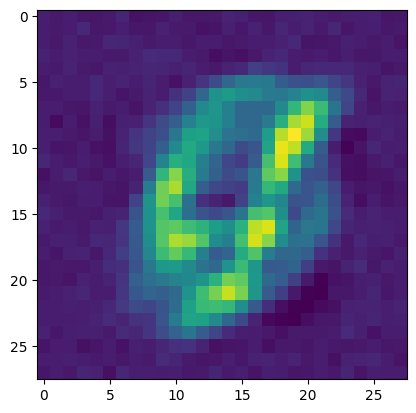

epoch: 3, step: 0, loss: 0.06239166110754013
epoch: 3, step: 200, loss: 0.0600864551961422
epoch: 3, step: 400, loss: 0.059369269758462906


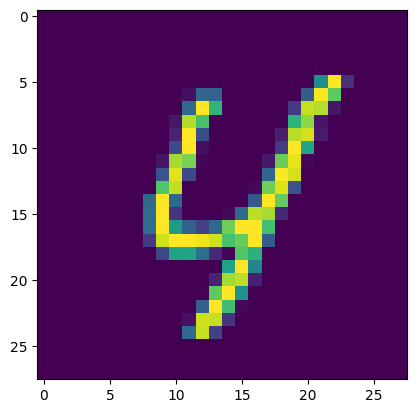

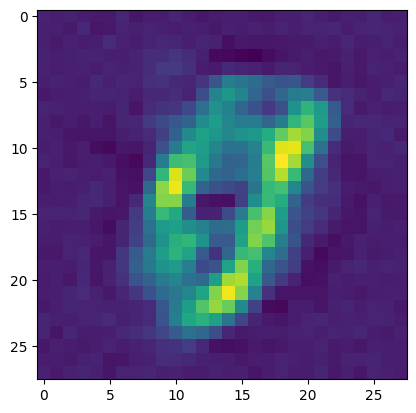

epoch: 4, step: 0, loss: 0.058183085173368454
epoch: 4, step: 200, loss: 0.057760972529649734
epoch: 4, step: 400, loss: 0.05498572066426277


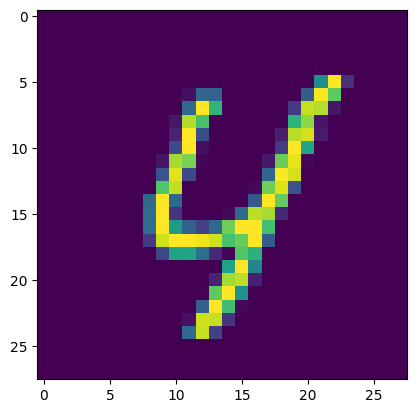

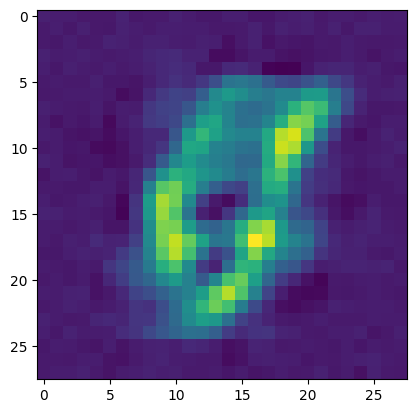

epoch: 5, step: 0, loss: 0.05437205731868744
epoch: 5, step: 200, loss: 0.05633251741528511
epoch: 5, step: 400, loss: 0.0536903515458107


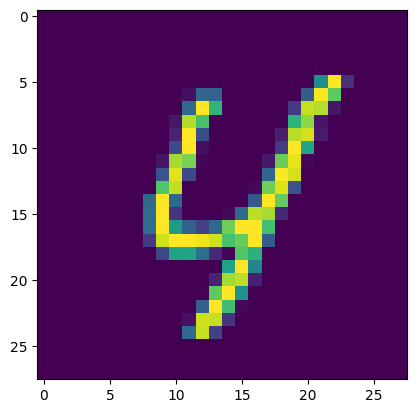

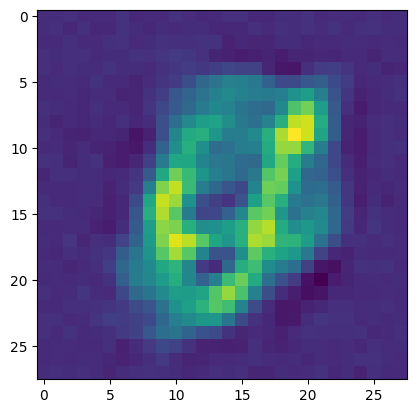

epoch: 0, step: 0, loss: 0.13385546207427979
epoch: 0, step: 200, loss: 0.12578479945659637
epoch: 0, step: 400, loss: 0.11867855489253998
epoch: 1, step: 0, loss: 0.12475940585136414
epoch: 1, step: 200, loss: 0.11749103665351868
epoch: 1, step: 400, loss: 0.11490562558174133
epoch: 2, step: 0, loss: 0.11988570541143417
epoch: 2, step: 200, loss: 0.11196500062942505
epoch: 2, step: 400, loss: 0.11491284519433975
epoch: 3, step: 0, loss: 0.10851234942674637
epoch: 3, step: 200, loss: 0.11176344752311707
epoch: 3, step: 400, loss: 0.1144498661160469
epoch: 4, step: 0, loss: 0.1055232435464859
epoch: 4, step: 200, loss: 0.10972866415977478
epoch: 4, step: 400, loss: 0.10826975852251053
epoch: 5, step: 0, loss: 0.10863455384969711
epoch: 5, step: 200, loss: 0.10516929626464844
epoch: 5, step: 400, loss: 0.10795982927083969


In [15]:
# hidden_out = 40
model = LinearAutoEncoder(in_chan, hidden_ch, out_ch).to(device)
optim = torch.optim.Adam(model.parameters())
loss_func1 = nn.MSELoss()
loss_func2 = nn.L1Loss()

for epoch in range(n_epochs):
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()
        target = inputs.view(inputs.size(0), -1).to(device)
        predict = model(target)
        loss = loss_func(target, predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    item = dataset_test.data[555].unsqueeze(0).view(1, -1).to(device).float()
    plt.imshow(dataset_test.data[555].detach().numpy())
    plt.show()
    plt.imshow(model(item).view((28, 28)).cpu().detach().numpy())
    plt.show()
    torch.save(model.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')


for epoch in range(n_epochs):
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()
        target = inputs.view(inputs.size(0), -1).to(device)
        predict = model(target)
        loss = loss_func2(target, predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    item = dataset_test.data[555].unsqueeze(0).view(1, -1).to(device).float()

    torch.save(model.state_dict(), f'./lin2_ae_chkpt_{epoch}.pth')

plt.show()


In [ ]:
input_channels = 1
hidden_channels = 64

In [ ]:
class ConvEncoder(nn.Module):
  #28x28 -> hidden -> hidden_out
  def __init__(self, input_ch, hidden_ch):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(input_ch, hidden_ch, kernel_size=5, stride=1, 
                           padding=2)
    self.do1 = nn.Dropout(0.1)
    self.pool1 = nn.MaxPool2d((2, 2)) # 14 x 14

    self.conv2 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1, 
                           padding=1)
    self.do2 = nn.Dropout(0.1)
    self.pool2 = nn.MaxPool2d((2, 2)) # 7 x 7
    self.conv3 = nn.Conv2d(hidden_ch, 1, kernel_size=3, stride=1, 
                           padding=1)
    self.activ = nn.ReLU()

  def forward(self, x):
    x = self.pool1(self.do1(self.activ(self.conv1(x))))
    x = self.pool2(self.do2(self.activ(self.conv2(x))))

    return self.conv3(x)

class ConvDecoder(nn.Module):
  #hidden_out-> hidden -> 28*28 
  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(1, hidden_ch, kernel_size=3, stride=1, 
                           padding=1)
    self.do1 = nn.Dropout(0.1)
    self.upsample1 = nn.UpsamplingNearest2d(scale_factor=2) # 14 x 14

    self.conv2 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1, 
                           padding=1)
    self.do2 = nn.Dropout(0.1)
    self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2) # 28 x 28
    self.conv3 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1, 
                           padding=2)
    self.activ = nn.ReLU()

  def forward(self, x):
    x = self.upsample1(self.do1(self.activ(self.conv1(x))))
    x = self.upsample2(self.do2(self.activ(self.conv2(x))))

    return self.conv3(x)

class ConvAutoEncoder(nn.Module):
  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    self.encoder = ConvEncoder(input_ch, hidden_ch, )
    self.decoder = ConvDecoder(input_ch, hidden_ch, )

  def forward(self, x):
    hidden = self.encoder(x)
    x_ = self.decoder(hidden)

    return x_


In [ ]:
model = ConvAutoEncoder(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model.parameters())
loss_func = nn.MSELoss() #TODO try to use MAE


epoch: 0, step: 0, loss: 0.8945428133010864
epoch: 0, step: 200, loss: 0.08922065049409866
epoch: 0, step: 400, loss: 0.06428059190511703


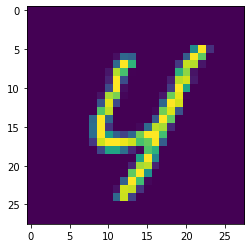

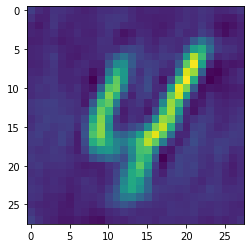

epoch: 1, step: 0, loss: 0.05733494833111763
epoch: 1, step: 200, loss: 0.05608991160988808
epoch: 1, step: 400, loss: 0.049182020127773285


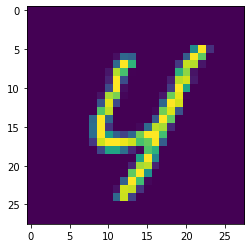

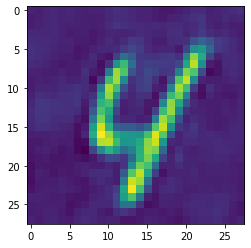

epoch: 2, step: 0, loss: 0.04733401909470558
epoch: 2, step: 200, loss: 0.044584009796381
epoch: 2, step: 400, loss: 0.043085407465696335


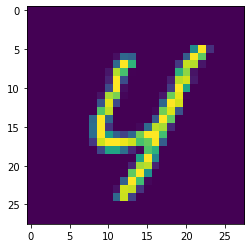

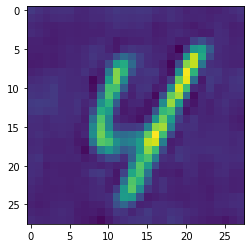

In [ ]:
for epoch in range(n_epochs):
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict = model(inputs.to(device))
        loss = loss_func(inputs.to(device), predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    item = dataset_test[555][0].unsqueeze(0).to(device).float()
    plt.imshow(dataset_test[555][0].squeeze().detach().numpy())
    plt.show()
    plt.imshow(model(item).squeeze().squeeze().cpu().detach().numpy())
    plt.show()
    torch.save(model.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')

epoch: 0, step: 0, loss: 0.8796212673187256
epoch: 0, step: 200, loss: 0.10528278350830078
epoch: 0, step: 400, loss: 0.08358976989984512


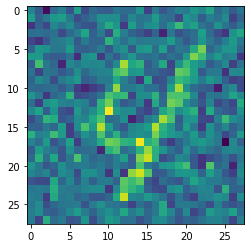

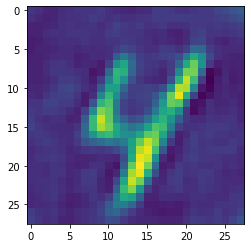

epoch: 1, step: 0, loss: 0.0788608118891716
epoch: 1, step: 200, loss: 0.07276822626590729
epoch: 1, step: 400, loss: 0.06787053495645523


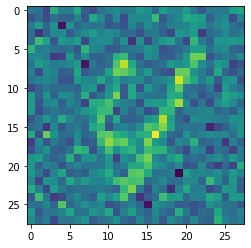

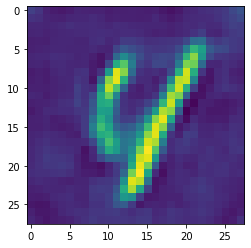

epoch: 2, step: 0, loss: 0.06606804579496384
epoch: 2, step: 200, loss: 0.06281448900699615
epoch: 2, step: 400, loss: 0.061391431838274


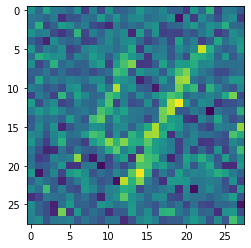

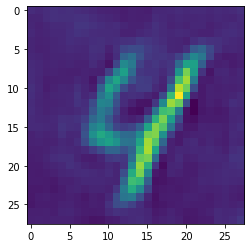

In [ ]:
model = ConvAutoEncoder(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model.parameters())
loss_func = nn.MSELoss() #TODO try to use MAE

for epoch in range(n_epochs):
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()
        inputs = inputs.to(device)
        noise_inputs = inputs + \
        torch.normal(torch.zeros_like(inputs), torch.ones_like(inputs)) * 0.7 
        predict = model(noise_inputs)
        loss = loss_func(inputs, predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    item = dataset_test[555][0].unsqueeze(0).to(device).float()
    item = item + torch.normal(torch.zeros_like(item), torch.ones_like(item)) * 0.7
    plt.imshow(item.squeeze().squeeze().cpu().detach().numpy())
    plt.show()
    plt.imshow(model(item).squeeze().squeeze().cpu().detach().numpy())
    plt.show()
    torch.save(model.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')

In [16]:
class ConvVAEncoder(nn.Module):
  #28*28 -> hidden -> hidden_out
  def __init__(self, input_ch, hidden_ch):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(input_ch, hidden_ch, kernel_size=5, stride=1, 
                           padding=2) # 28x28
    self.do1 = nn.Dropout(0.1)
    self.pool1 = nn.MaxPool2d(2, 2) # 14x14
    self.conv2 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1, 
                           padding=1) # 14x14
    self.do2 = nn.Dropout(0.1)
    self.pool2 = nn.MaxPool2d(2, 2) # 7x7
    self.conv3_mu = nn.Conv2d(hidden_ch, 1, kernel_size=3, stride=1, 
                           padding=1) # 7x7
    self.conv3_sigma = nn.Conv2d(hidden_ch, 1, kernel_size=3, stride=1, 
                           padding=1) # 7x7
    self.activ = nn.ReLU()

  def forward(self, x):
    x = self.pool1(self.do1(self.activ(self.conv1(x))))
    x = self.pool2(self.do2(self.activ(self.conv2(x))))
    mu = self.conv3_mu(x)
    sigma = torch.exp(self.conv3_sigma(x))

    return mu, sigma

class ConvDecoder(nn.Module):
  #hidden_out-> hidden -> 28*28 
  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(1, hidden_ch, kernel_size=3, stride=1, 
                           padding=1) # 7x7
    self.do1 = nn.Dropout(0.1)
    self.upsample1 = nn.UpsamplingNearest2d(scale_factor=2) # 14x14
    self.conv2 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1, 
                           padding=1) # 14x14
    self.do2 = nn.Dropout(0.1)
    self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2) # 28x28
    self.conv3 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1, 
                           padding=2) # 28x28
    self.activ = nn.ReLU()
  def forward(self, x):
    x = self.upsample1(self.do1(self.activ(self.conv1(x))))
    x = self.upsample2(self.do2(self.activ(self.conv2(x))))
    x = self.conv3(x)


    return x

def sampling(mu, sigma):
    return torch.normal(torch.zeros_like(mu), torch.ones_like(mu)) * sigma + mu

class ConvVAE(nn.Module):
  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    self.encoder = ConvVAEncoder(input_ch, hidden_ch, )
    self.decoder = ConvDecoder(input_ch, hidden_ch, )

  def forward(self, x):
    mu, sigma = self.encoder(x)
    hidden = sampling(mu, sigma)
    x_ = self.decoder(hidden)

    return x_, mu, sigma

epoch: 0, step: 0, loss: 0.977493941783905, MSE
epoch: 0, step: 200, loss: 0.10631415992975235, MSE
epoch: 0, step: 400, loss: 0.09178727865219116, MSE


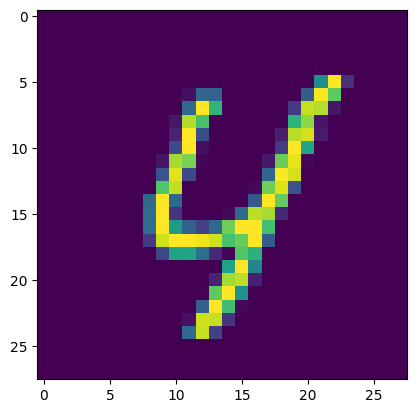

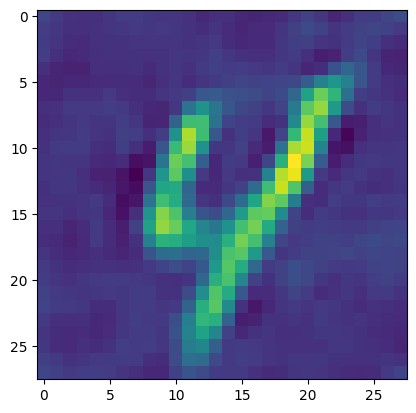

epoch: 1, step: 0, loss: 0.08832000941038132, MSE
epoch: 1, step: 200, loss: 0.07874168455600739, MSE
epoch: 1, step: 400, loss: 0.07637298107147217, MSE


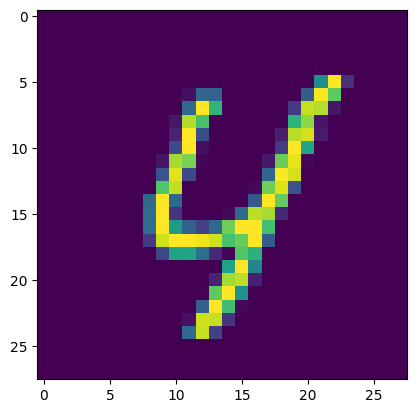

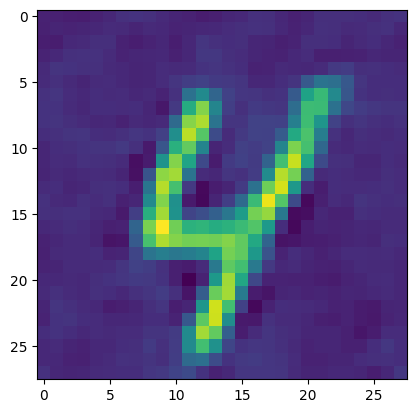

epoch: 2, step: 0, loss: 0.07518105208873749, MSE
epoch: 2, step: 200, loss: 0.07541856914758682, MSE
epoch: 2, step: 400, loss: 0.06955979764461517, MSE


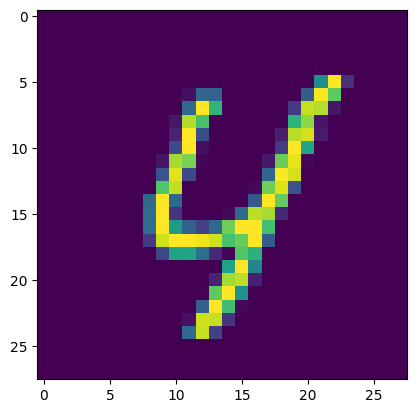

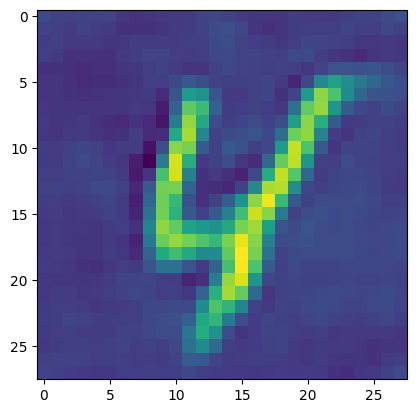

epoch: 3, step: 0, loss: 0.066078782081604, MSE
epoch: 3, step: 200, loss: 0.06763111054897308, MSE
epoch: 3, step: 400, loss: 0.06436051428318024, MSE


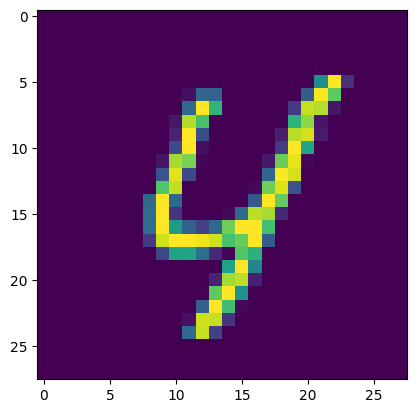

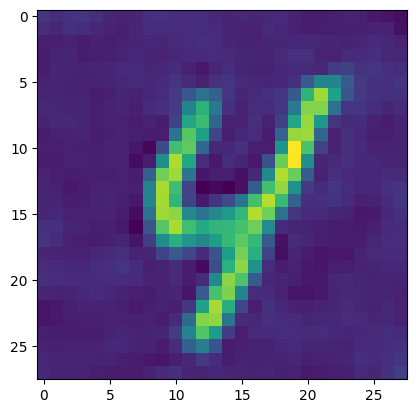

epoch: 4, step: 0, loss: 0.06595779955387115, MSE
epoch: 4, step: 200, loss: 0.06486007571220398, MSE
epoch: 4, step: 400, loss: 0.06366162747144699, MSE


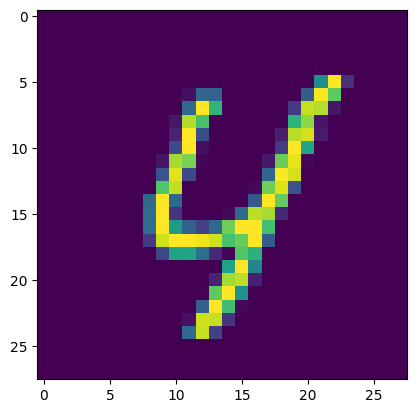

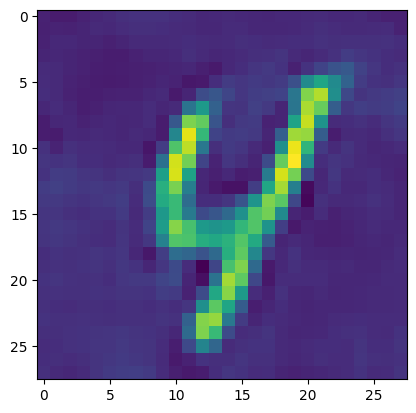

epoch: 5, step: 0, loss: 0.06264510750770569, MSE
epoch: 5, step: 200, loss: 0.06191986799240112, MSE
epoch: 5, step: 400, loss: 0.06223587691783905, MSE


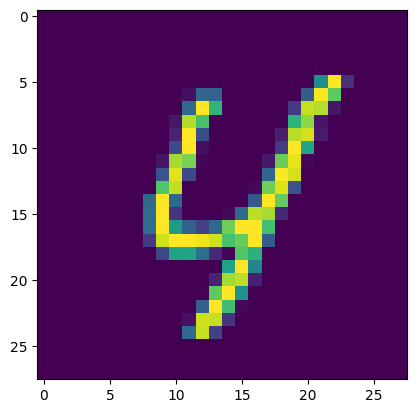

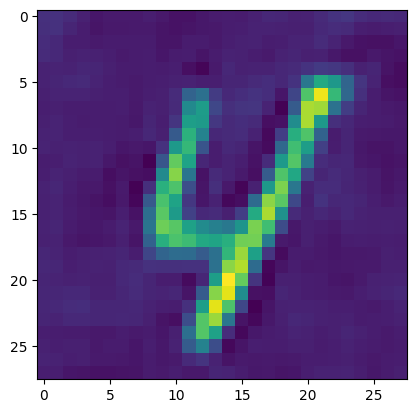

epoch: 6, step: 0, loss: 0.061118945479393005, MSE
epoch: 6, step: 200, loss: 0.06004773825407028, MSE
epoch: 6, step: 400, loss: 0.06260386109352112, MSE


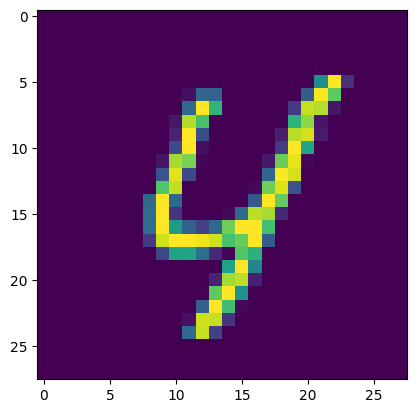

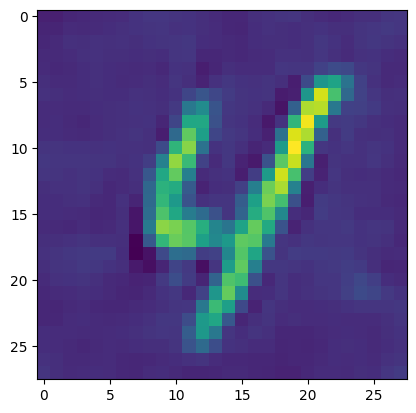

epoch: 7, step: 0, loss: 0.06167881190776825, MSE
epoch: 7, step: 200, loss: 0.05928114056587219, MSE
epoch: 7, step: 400, loss: 0.0580051951110363, MSE


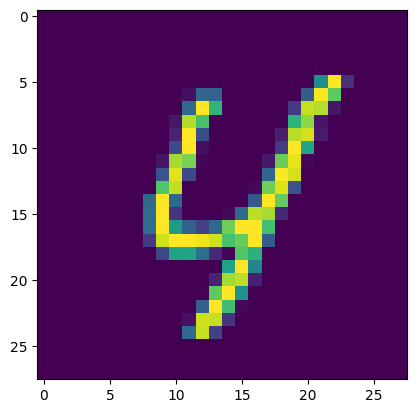

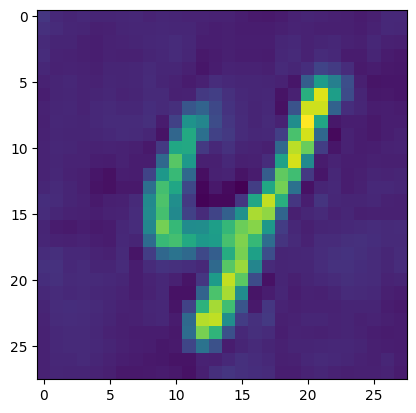

epoch: 8, step: 0, loss: 0.05894593149423599, MSE
epoch: 8, step: 200, loss: 0.05998561531305313, MSE
epoch: 8, step: 400, loss: 0.05723629146814346, MSE


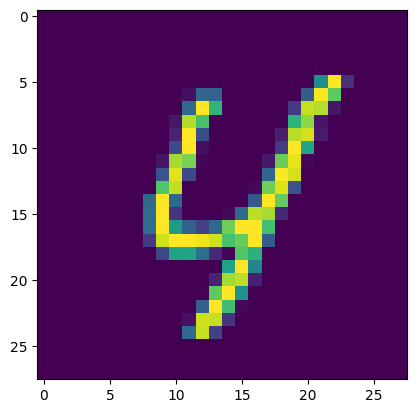

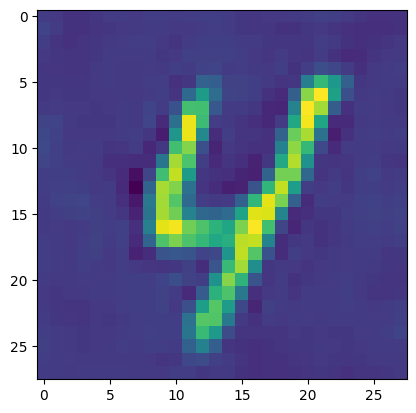

epoch: 9, step: 0, loss: 0.058370016515254974, MSE
epoch: 9, step: 200, loss: 0.05783558636903763, MSE
epoch: 9, step: 400, loss: 0.058325499296188354, MSE


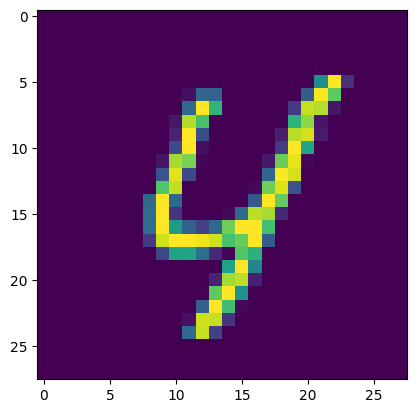

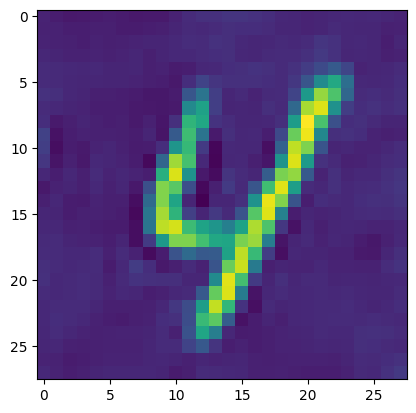

epoch: 0, step: 0, loss: 0.9617270827293396, MAE
epoch: 0, step: 200, loss: 0.2632405757904053, MAE
epoch: 0, step: 400, loss: 0.18146705627441406, MAE


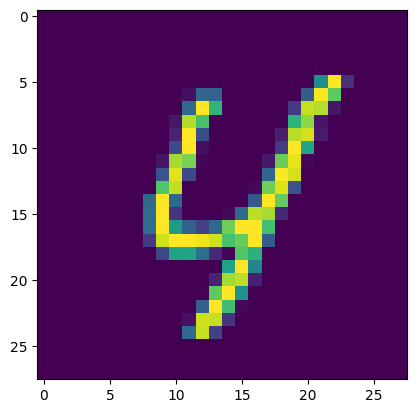

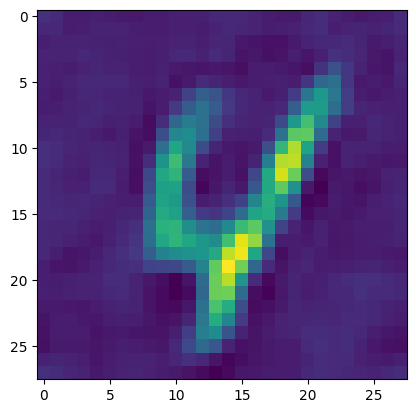

epoch: 1, step: 0, loss: 0.17165015637874603, MAE
epoch: 1, step: 200, loss: 0.1616930365562439, MAE
epoch: 1, step: 400, loss: 0.15268263220787048, MAE


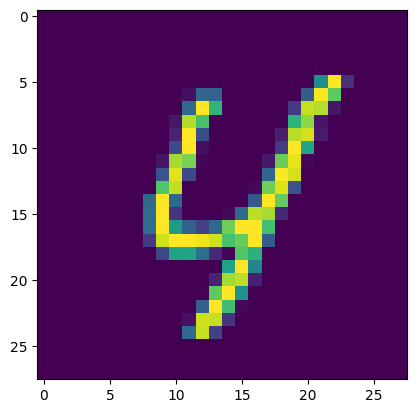

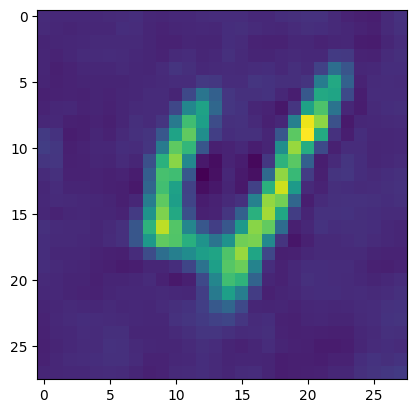

epoch: 2, step: 0, loss: 0.14903631806373596, MAE
epoch: 2, step: 200, loss: 0.14103980362415314, MAE
epoch: 2, step: 400, loss: 0.13877235352993011, MAE


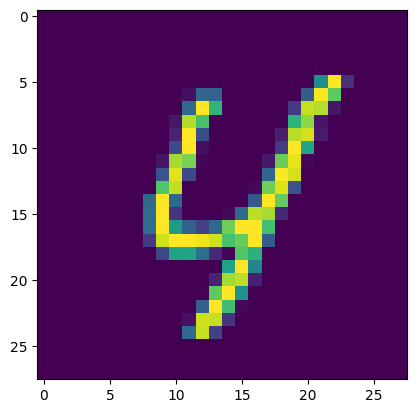

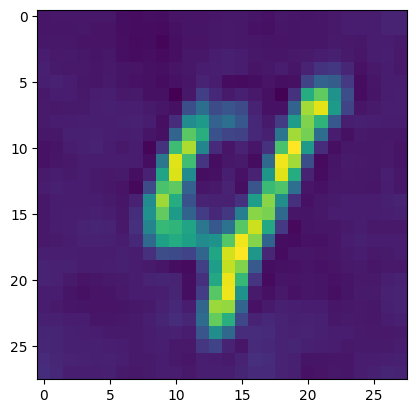

epoch: 3, step: 0, loss: 0.1408911943435669, MAE
epoch: 3, step: 200, loss: 0.13635297119617462, MAE
epoch: 3, step: 400, loss: 0.13159944117069244, MAE


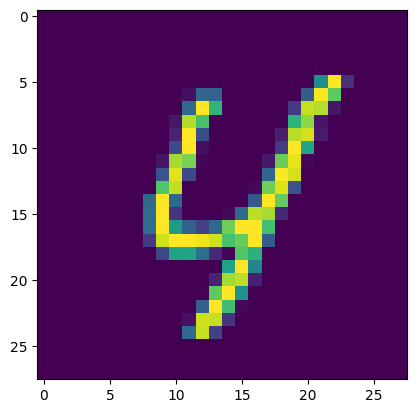

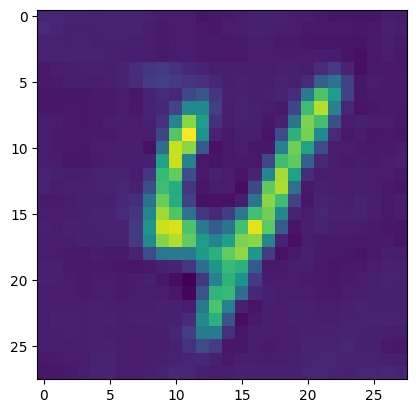

epoch: 4, step: 0, loss: 0.12672625482082367, MAE
epoch: 4, step: 200, loss: 0.13503719866275787, MAE
epoch: 4, step: 400, loss: 0.13015468418598175, MAE


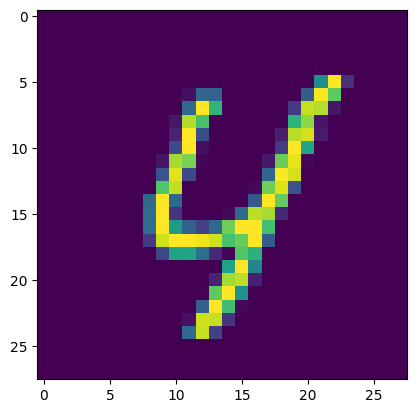

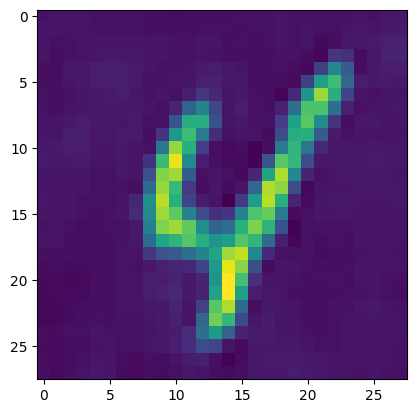

epoch: 5, step: 0, loss: 0.12977823615074158, MAE
epoch: 5, step: 200, loss: 0.1267848014831543, MAE
epoch: 5, step: 400, loss: 0.11355414986610413, MAE


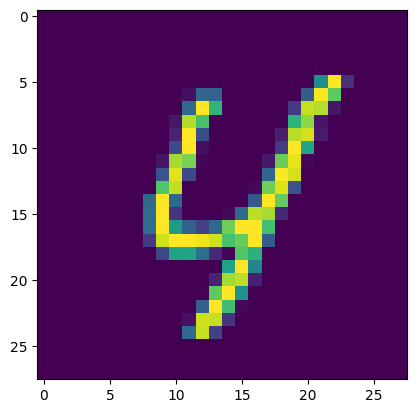

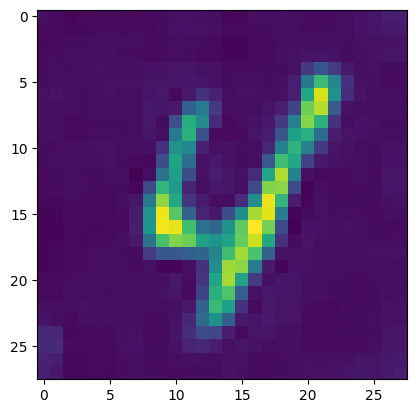

epoch: 6, step: 0, loss: 0.12219852209091187, MAE
epoch: 6, step: 200, loss: 0.1189846396446228, MAE
epoch: 6, step: 400, loss: 0.11962845176458359, MAE


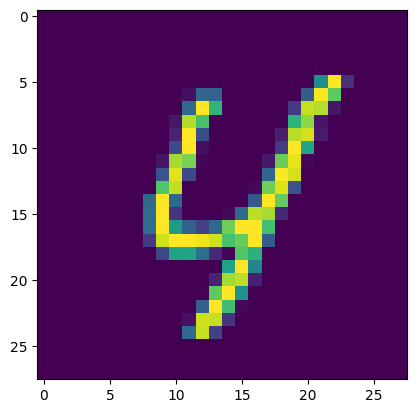

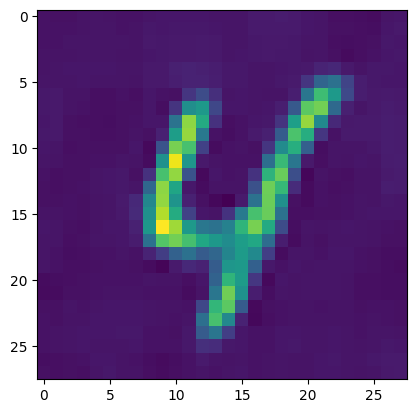

epoch: 7, step: 0, loss: 0.11889201402664185, MAE
epoch: 7, step: 200, loss: 0.11740809679031372, MAE
epoch: 7, step: 400, loss: 0.11223757266998291, MAE


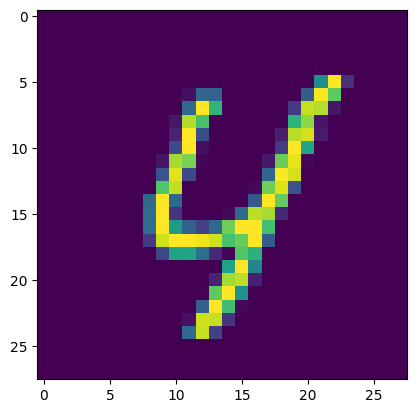

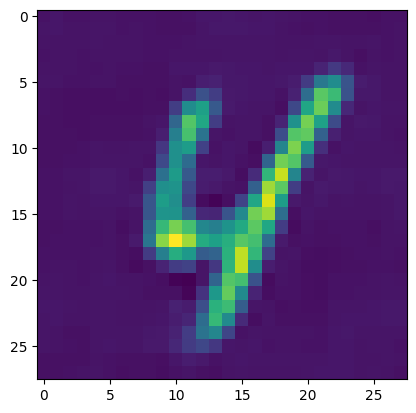

epoch: 8, step: 0, loss: 0.11574890464544296, MAE
epoch: 8, step: 200, loss: 0.12208531051874161, MAE
epoch: 8, step: 400, loss: 0.11407613009214401, MAE


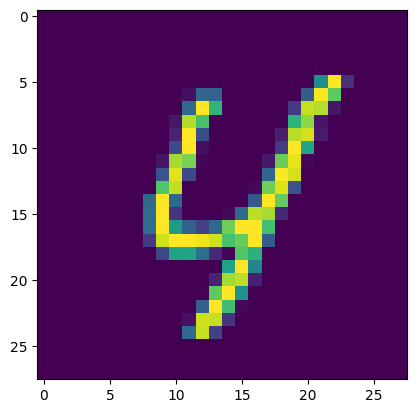

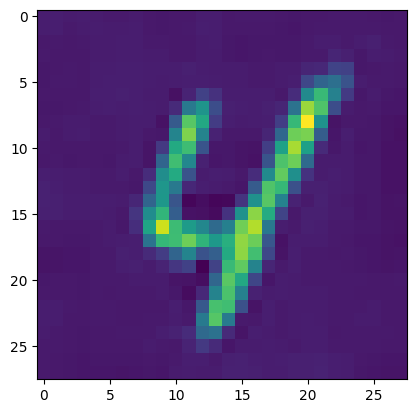

epoch: 9, step: 0, loss: 0.11269933730363846, MAE
epoch: 9, step: 200, loss: 0.11233771592378616, MAE
epoch: 9, step: 400, loss: 0.11485950648784637, MAE


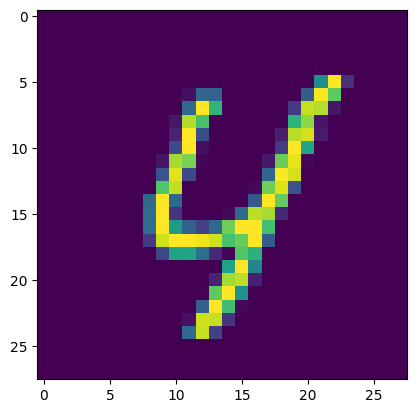

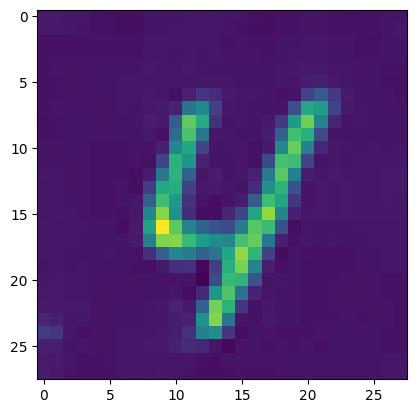

In [20]:
# hyperparams
input_channels = 1
inp_dim = 28 * 28
batch_size = 128
n_epochs=10
hidden_channels=64

def kl_loss(mu, sigma):
    p = torch.distributions.Normal(mu, sigma)
    q = torch.distributions.Normal(torch.zeros_like(mu), torch.ones_like(mu))
    return torch.distributions.kl_divergence(p, q).mean()

model = ConvVAE(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model.parameters())
loss_func = nn.MSELoss() #TODO try to use MAE

for epoch in range(n_epochs):
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()
        inputs = inputs.to(device)
        # noise_inputs = inputs + \
        # torch.normal(torch.zeros_like(inputs), torch.ones_like(inputs)) * 0.7 
        predict, mu, sigma = model(inputs)
        loss = loss_func(inputs, predict) + 0.01 * kl_loss(mu, sigma)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}, MSE')
    item = dataset_test[555][0].unsqueeze(0).to(device).float()
    # item = item + torch.normal(torch.zeros_like(item), torch.ones_like(item)) * 0.7
    plt.imshow(item.squeeze().squeeze().cpu().detach().numpy())
    plt.show()
    plt.imshow(model(item)[0].squeeze().squeeze().cpu().detach().numpy())
    plt.show()
    torch.save(model.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')

model = ConvVAE(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model.parameters())
loss_func = nn.L1Loss() 

for epoch in range(n_epochs):
  for i, batch in enumerate(trainloader):
      inputs, labels = batch
      optim.zero_grad()
      inputs = inputs.to(device)
      # noise_inputs = inputs + \
      # torch.normal(torch.zeros_like(inputs), torch.ones_like(inputs)) * 0.7 
      predict, mu, sigma = model(inputs)
      loss = loss_func(inputs, predict) + 0.01 * kl_loss(mu, sigma)
      loss.backward()
      optim.step()
      if i % 200 == 0:
          print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}, MAE')
  item = dataset_test[555][0].unsqueeze(0).to(device).float()
  # item = item + torch.normal(torch.zeros_like(item), torch.ones_like(item)) * 0.7
  plt.imshow(item.squeeze().squeeze().cpu().detach().numpy())
  plt.show()
  plt.imshow(model(item)[0].squeeze().squeeze().cpu().detach().numpy())
  plt.show()
  torch.save(model.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')

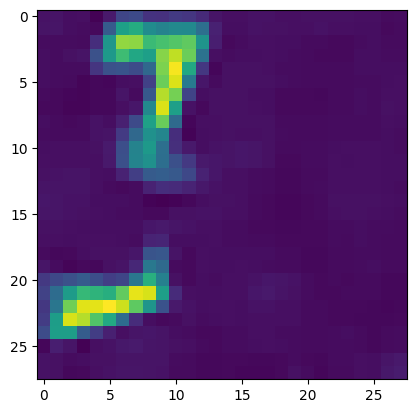

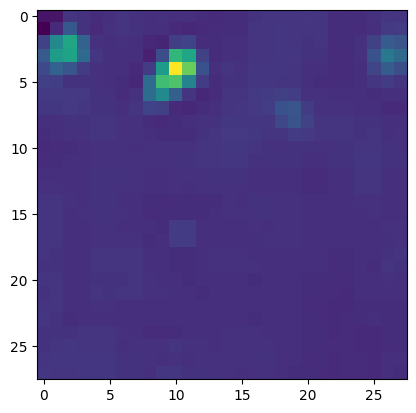

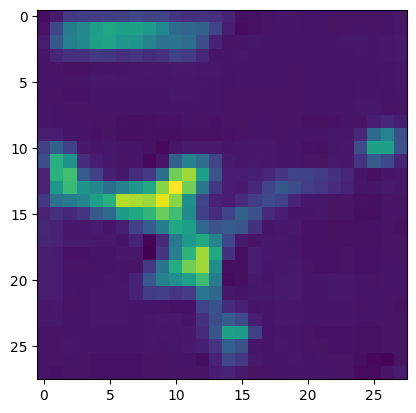

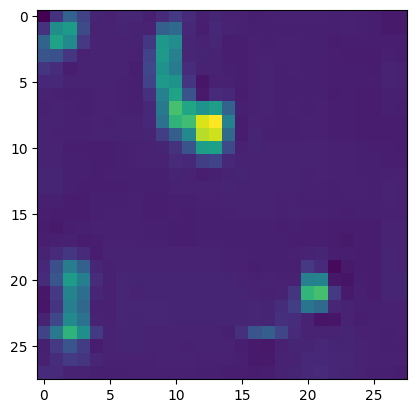

In [22]:
item = dataset_test[555][0].unsqueeze(0).to(device).float()
mu, sigma = model.encoder(item)

for _ in range(4):
    hid = torch.normal(torch.zeros((1,1,7,7)), torch.ones((1,1,7,7))).to(device) 

    plt.imshow(model.decoder(hid).squeeze().squeeze().cpu().detach().numpy())
    plt.show()